# COURSE 5 TASK 3: Classification

## Import and Prepare the Data

In [1]:
#load libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [2]:
credit = pd.read_csv('/Users/priscillaloebenberg/Desktop/Course5/defaultofcreditcardclients.csv', header =1)
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
# Column names
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
#check for any missing values
credit.isnull().values.any()

False

In [7]:
#remove ID 
credit.drop('ID', axis = 1, inplace=True)

In [8]:
#rename 'default payment next month' to DEFAULT
credit.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [9]:
credit['SEX']=credit['SEX'].map({2:'Female', 1:'Male'})

In [10]:
#combine values of 'others' in education
x = {1:1, 2:2, 3:3, 0:4,5:4,6:4}
credit.EDUCATION = credit.EDUCATION.replace(x)
credit.EDUCATION.describe()

count    30000.000000
mean         1.842267
std          0.744494
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: EDUCATION, dtype: float64

In [11]:
credit['EDUCATION']=credit['EDUCATION'].map({1:'Graduate', 2:'University', 3:'High_School', 4:'Others'})

In [12]:
credit['MARRIAGE'] = credit['MARRIAGE'].map({1:'Married', 2:'Single', 3:'Divorced', 0:'Others'})

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

In [14]:
# Determining the shape of the datset

credit.shape

(30000, 24)

## Perform Expoloratory Data Analysis

### Visualizing the data

#### Histograms

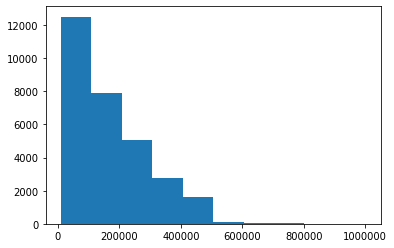

In [15]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

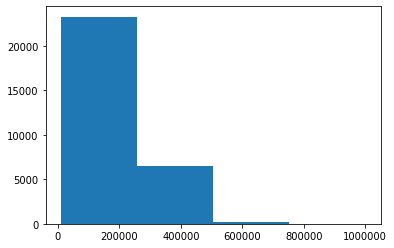

In [16]:
#binning histogram
plt.hist(credit['LIMIT_BAL'], bins=4)

#### Line Plots

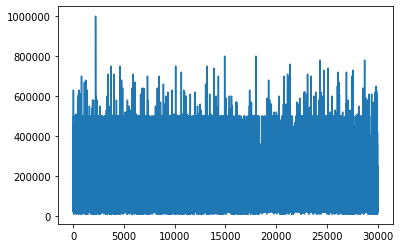

In [17]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

#### Scatter Plots

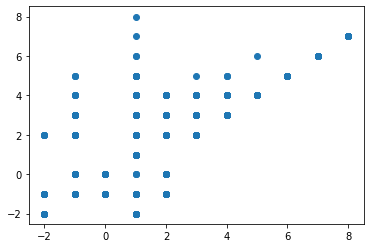

In [18]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

#### Box Plots

In [19]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')


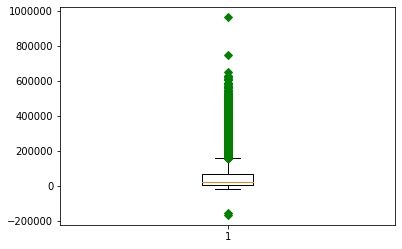

In [20]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

### Correlation

In [21]:
corrMat = credit.corr()
print(corrMat)

           LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
LIMIT_BAL   1.000000  0.144713 -0.271214 -0.296382 -0.286123 -0.267460   
AGE         0.144713  1.000000 -0.039447 -0.050148 -0.053048 -0.049722   
PAY_0      -0.271214 -0.039447  1.000000  0.672164  0.574245  0.538841   
PAY_2      -0.296382 -0.050148  0.672164  1.000000  0.766552  0.662067   
PAY_3      -0.286123 -0.053048  0.574245  0.766552  1.000000  0.777359   
PAY_4      -0.267460 -0.049722  0.538841  0.662067  0.777359  1.000000   
PAY_5      -0.249411 -0.053826  0.509426  0.622780  0.686775  0.819835   
PAY_6      -0.235195 -0.048773  0.474553  0.575501  0.632684  0.716449   
BILL_AMT1   0.285430  0.056239  0.187068  0.234887  0.208473  0.202812   
BILL_AMT2   0.278314  0.054283  0.189859  0.235257  0.237295  0.225816   
BILL_AMT3   0.283236  0.053710  0.179785  0.224146  0.227494  0.244983   
BILL_AMT4   0.293988  0.051353  0.179125  0.222237  0.227202  0.245917   
BILL_AMT5   0.295562  0.049345  0.1806

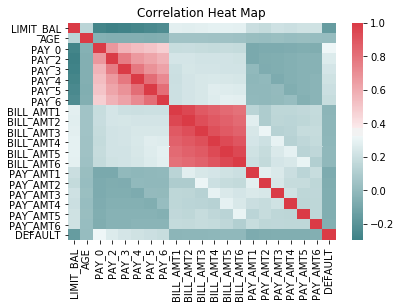

In [22]:
# Create Heat Map
corrmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corrMat,
            xticklabels = corrMat.columns.values,
            yticklabels = corrMat.columns.values,
            cmap = corrmap)
plt.plot()
plt.title('Correlation Heat Map')
plt.show()

### Covariance

In [23]:
covMat = credit.cov()
print(covMat)

              LIMIT_BAL            AGE         PAY_0         PAY_2  \
LIMIT_BAL  1.683446e+10  173076.722569 -39545.930009 -46037.648360   
AGE        1.730767e+05      84.969755     -0.408639     -0.553408   
PAY_0     -3.954593e+04      -0.408639      1.262930      0.904330   
PAY_2     -4.603765e+04      -0.553408      0.904330      1.433254   
PAY_3     -4.443225e+04      -0.585263      0.772384      1.098371   
PAY_4     -4.057181e+04      -0.535851      0.707972      0.926680   
PAY_5     -3.667056e+04      -0.562245      0.648743      0.844886   
PAY_6     -3.509308e+04      -0.517022      0.613292      0.792320   
BILL_AMT1  2.727020e+09   38172.933546  15480.304170  20706.614217   
BILL_AMT2  2.570130e+09   35613.657962  15185.916919  20045.829482   
BILL_AMT3  2.548533e+09   34334.251320  14011.556537  18609.510991   
BILL_AMT4  2.453926e+09   30453.108180  12950.248389  17116.298983   
BILL_AMT5  2.331481e+09   27654.067800  12341.668685  16110.952468   
BILL_AMT6  2.243837e

### Additional EDA

In [24]:
#import data without categories
credit2 = pd.read_csv('/Users/priscillaloebenberg/Desktop/Course5/defaultofcreditcardclients.csv', header =1)
#remove ID 
credit2.drop('ID', axis = 1, inplace=True)
#rename 'default payment next month' to DEFAULT
credit2.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
credit2.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

#### Default

In [25]:
#count of default payment next month
credit.groupby('DEFAULT')['DEFAULT'].count()
#0-No default 1-Default

DEFAULT
0    23364
1     6636
Name: DEFAULT, dtype: int64

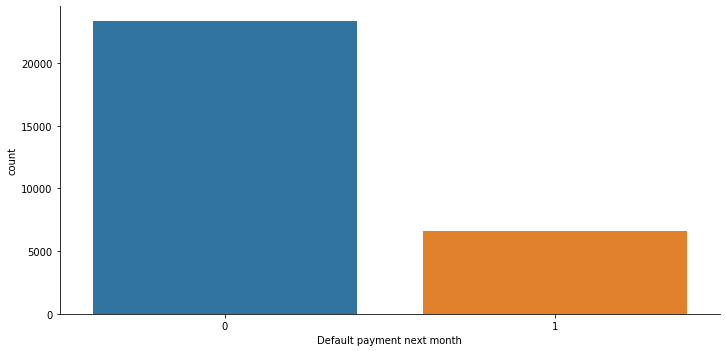

In [26]:
#Defaults
fg = sns.catplot('DEFAULT', data=credit, kind='count', aspect=2)
fg.set_xlabels('Default payment next month')
#0 is No default, 1 is default

In [27]:
# Percentage of defaults
perDef = 100*(credit.groupby('DEFAULT')['DEFAULT'].count()) / credit.shape[0]
print(f"Percent of {perDef}")

Percent of DEFAULT
0    77.88
1    22.12
Name: DEFAULT, dtype: float64


In [28]:
C0 = credit[credit['DEFAULT'] == 0]
C1 = credit[credit['DEFAULT'] == 1]

#### Payment History

In [29]:
# Payment status information 
credit.iloc[:,[5,6,7,8,9,10,23]].sort_values("DEFAULT")

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
14999,0,0,0,0,0,0,0
16193,-1,-1,-1,-1,-1,-1,0
16192,0,0,0,0,0,0,0
26347,2,2,2,2,0,0,0
26348,-2,-2,-2,-2,-2,-2,0
...,...,...,...,...,...,...,...
16208,-2,-1,0,-1,-1,-1,1
16209,2,0,0,2,2,2,1
16219,0,0,2,0,0,0,1
16183,1,-2,-2,-2,-1,0,1


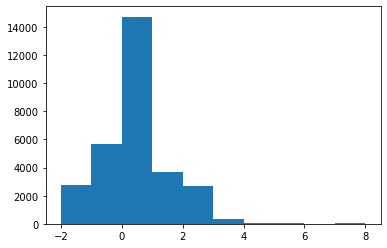

In [30]:
#histogram pay0
plt.hist(credit['PAY_0'])
plt.show()

#### Education

In [31]:
# Number of people for each education level
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
Graduate       10585
High_School     4917
Others           468
University     14030
Name: EDUCATION, dtype: int64

In [32]:
C0.groupby('EDUCATION')['EDUCATION'].count()
# No Default

EDUCATION
Graduate        8549
High_School     3680
Others           435
University     10700
Name: EDUCATION, dtype: int64

In [33]:
C1.groupby('EDUCATION')['EDUCATION'].count()
#Default

EDUCATION
Graduate       2036
High_School    1237
Others           33
University     3330
Name: EDUCATION, dtype: int64

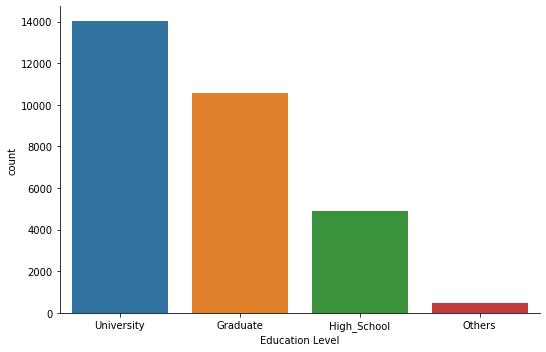

In [34]:
#plot count of education levels all
fg = sns.catplot('EDUCATION', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Education Level')

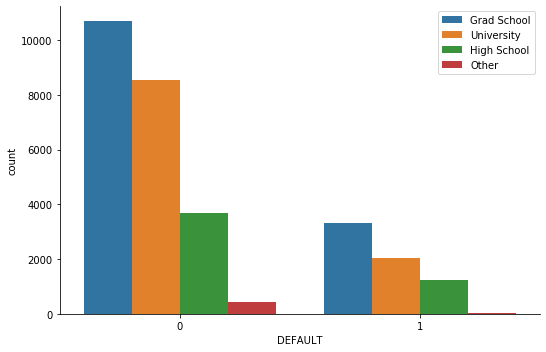

In [35]:
#plot education level by default
sns.catplot('DEFAULT', data = credit, hue='EDUCATION', kind='count', aspect = 1.5, legend=False)
plt.legend(['Grad School', 'University', 'High School', 'Other'])

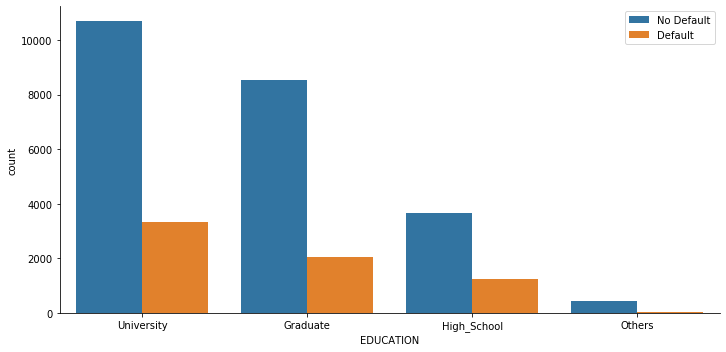

In [36]:
g = sns.catplot('EDUCATION', data = credit, hue='DEFAULT', kind='count', aspect=2, legend=False)
plt.legend(['No Default', 'Default'])

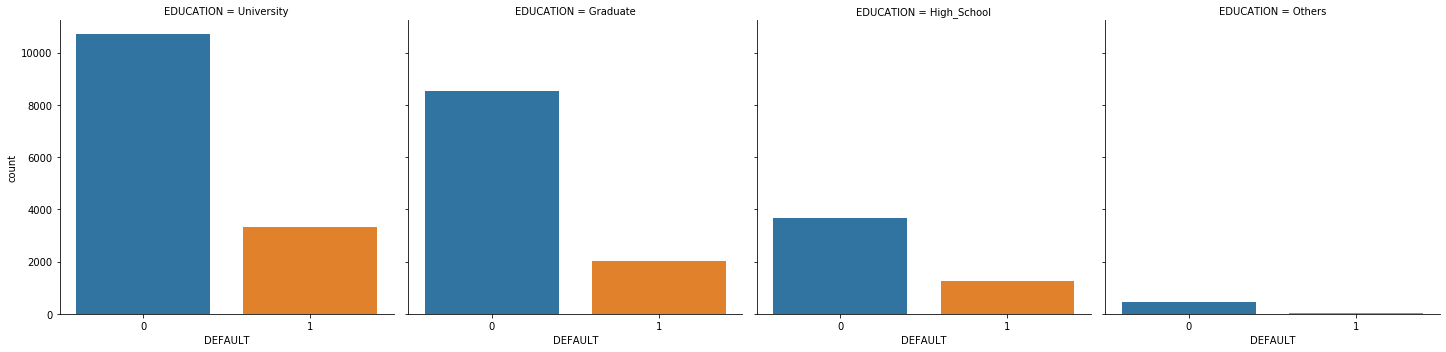

In [37]:
# visualize clients' education level vs default
sns.catplot(x='DEFAULT', col='EDUCATION', kind='count', data=credit)
plt.show()

#### Marriage

In [38]:
#count of Marriage statuses
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
Divorced      323
Married     13659
Others         54
Single      15964
Name: MARRIAGE, dtype: int64

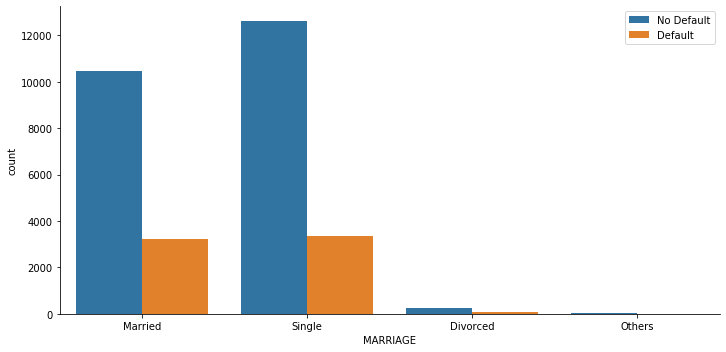

In [39]:
# Default by marriage
sns.catplot('MARRIAGE', data = credit, hue='DEFAULT', kind='count', aspect = 2, legend=False)
plt.legend(['No Default', 'Default'])

In [40]:
# Default by marriage pivot table
credit2.pivot_table('DEFAULT', 'MARRIAGE', aggfunc = np.sum, margins = True)

,DEFAULT
MARRIAGE,
0,5
1,3206
2,3341
3,84
All,6636


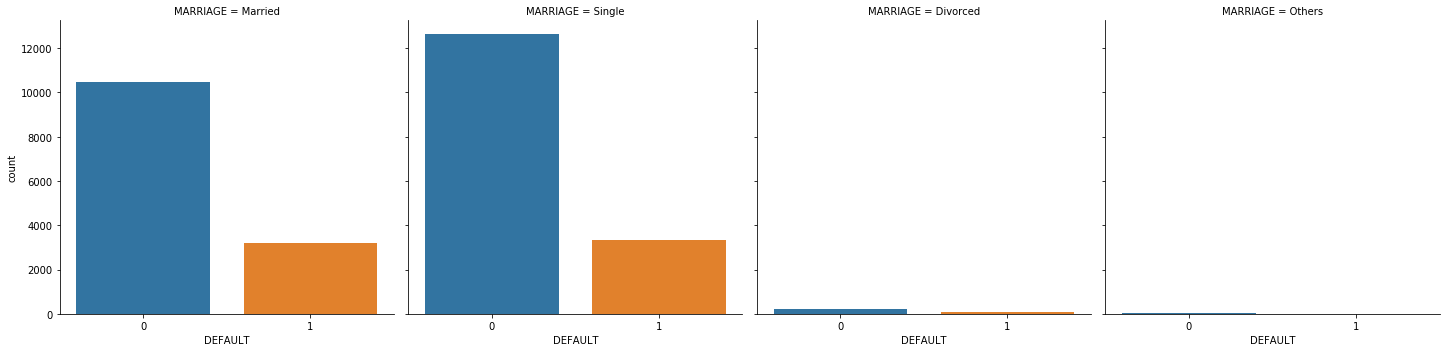

In [41]:
# visualize marital status vs default
sns.catplot(x='DEFAULT', col='MARRIAGE', kind='count', data=credit)
plt.show()

#### Age

In [42]:
#age information
credit.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [43]:
#median age
credit.AGE.median()

34.0

Text(0.5, 1.0, 'Distribution of Customer Ages')

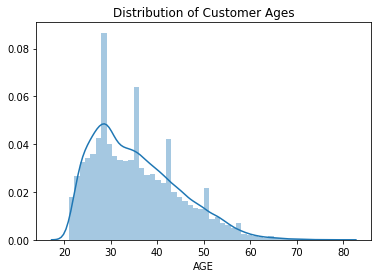

In [44]:
# Distribution of age
age_dist = sns.distplot(credit['AGE'])
age_dist.set_title("Distribution of Customer Ages")

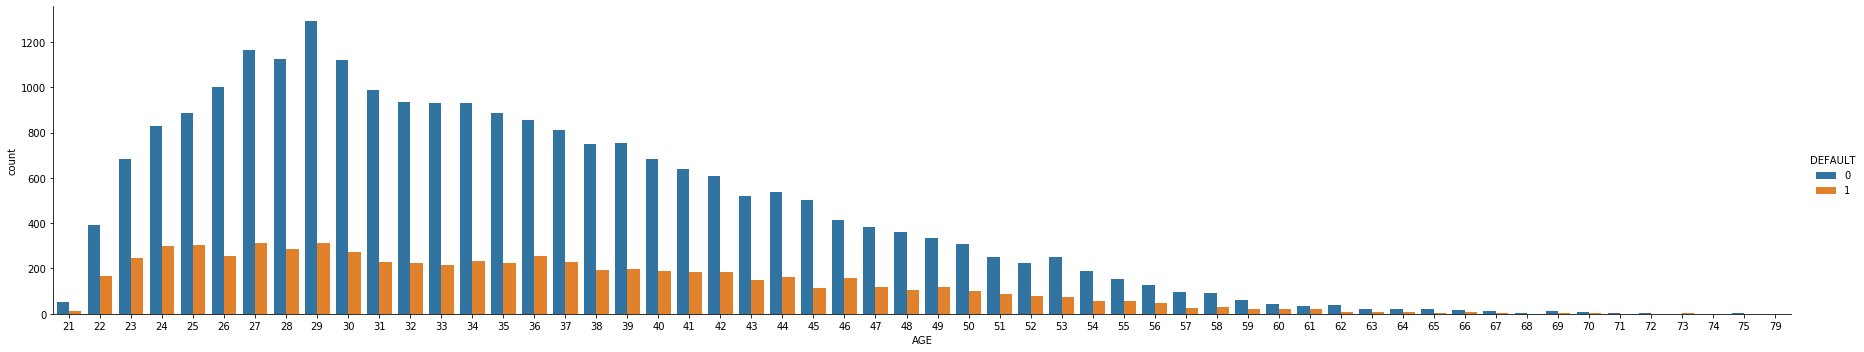

In [45]:
I = sns.catplot('AGE', data = credit, hue='DEFAULT',kind='count', aspect=5)


Text(0.5, 1.0, 'Distribution of Age Not In Default')

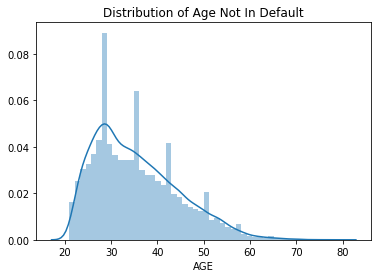

In [46]:
#Age No Default
age_dist0 = sns.distplot(C0['AGE'])
age_dist0.set_title("Distribution of Age Not In Default")

Text(0.5, 1.0, 'Distribution of Age In Default')

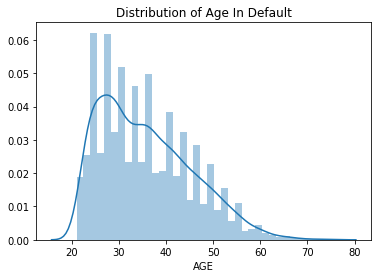

In [47]:
#Age Distribution for Defaults
age_dist1 = sns.distplot(C1['AGE'])
age_dist1.set_title("Distribution of Age In Default")

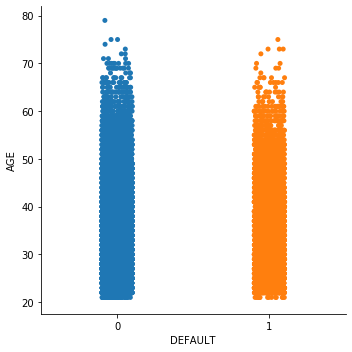

In [48]:
# visualize default status by age
sns.catplot(x='DEFAULT', y='AGE', data=credit)
plt.show()

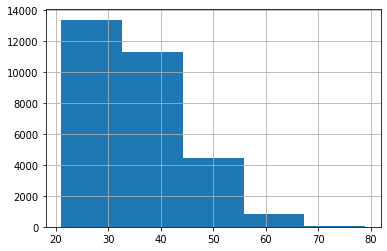

In [49]:
# histogram of age in 5 bins
credit['AGE'].hist(bins=5)

In [50]:
age_bin = [20,30,40,50,60,70,80]
age = pd.cut(credit2.AGE, age_bin)

credit2.pivot_table('DEFAULT', age, aggfunc = np.sum, margins = True)

,DEFAULT
AGE,
"(20, 30]",2471
"(30, 40]",2189
"(40, 50]",1399
"(50, 60]",504
"(60, 70]",68
"(70, 80]",5
All,6636


#### Credit Limit

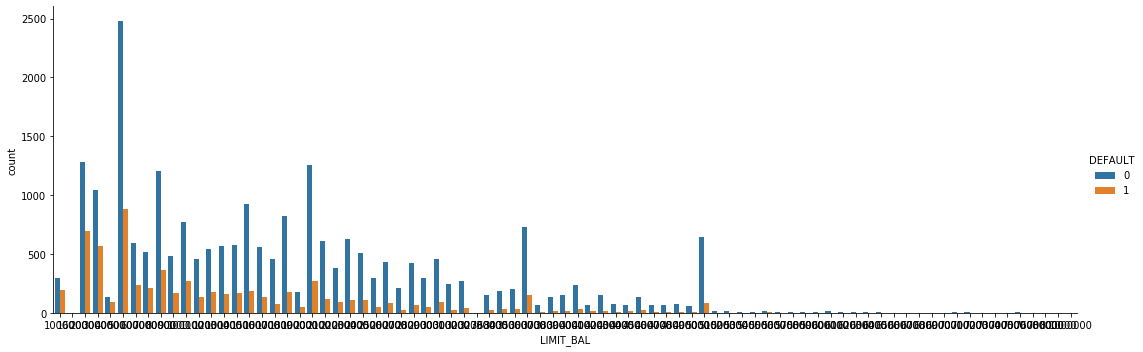

In [51]:
# Credit Limit by Default
L = sns.catplot('LIMIT_BAL', data = credit, hue='DEFAULT',kind='count', aspect=3)


Text(0.5, 1.0, 'Distribution of Limit Balance')

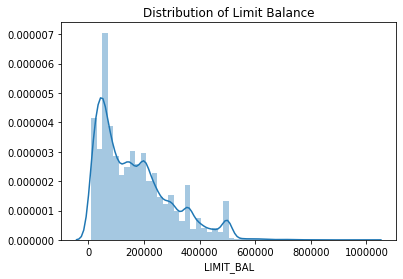

In [52]:
# Distribution of credit limit
limit_dist = sns.distplot(credit['LIMIT_BAL'])
limit_dist.set_title("Distribution of Limit Balance")

Text(0.5, 1.0, 'Distribution of Limit Balance Not In Default')

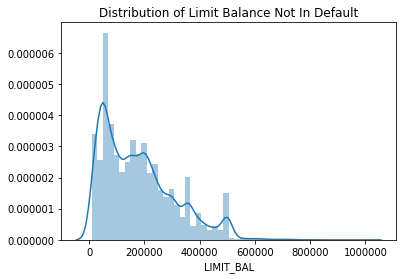

In [53]:
#Credit distribution No default
credit_dist0 = sns.distplot(C0['LIMIT_BAL'])
credit_dist0.set_title("Distribution of Limit Balance Not In Default")

Text(0.5, 1.0, 'Distribution of Limit Balance In Default')

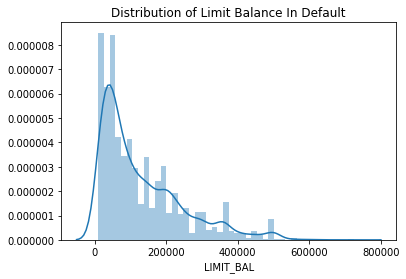

In [54]:
#Credit distribution default
credit_dist1 = sns.distplot(C1['LIMIT_BAL'])
credit_dist1.set_title("Distribution of Limit Balance In Default")

In [55]:
# credit limit by default
limit_bin = [0,200000,400000,600000,800000,1000000]
limit = pd.cut(credit.LIMIT_BAL, limit_bin)

credit2.pivot_table('DEFAULT', limit, aggfunc = np.sum, margins = True)

,DEFAULT
LIMIT_BAL,
"(0, 200000]",5219
"(200000, 400000]",1200
"(400000, 600000]",211
"(600000, 800000]",6
"(800000, 1000000]",0
All,6636


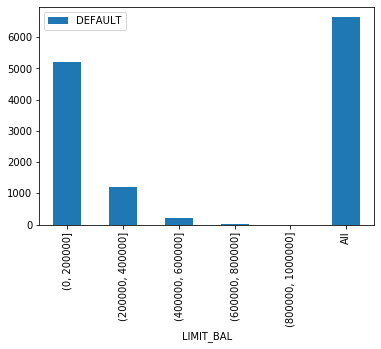

In [56]:
# Plot limit balance bins by default
limit_plot = credit2.pivot_table('DEFAULT', index = limit, aggfunc = np.sum, margins = True)
limit_plot.plot(kind='bar')

#### Sex

In [57]:
credit.groupby('SEX')['SEX'].count()

SEX
Female    18112
Male      11888
Name: SEX, dtype: int64

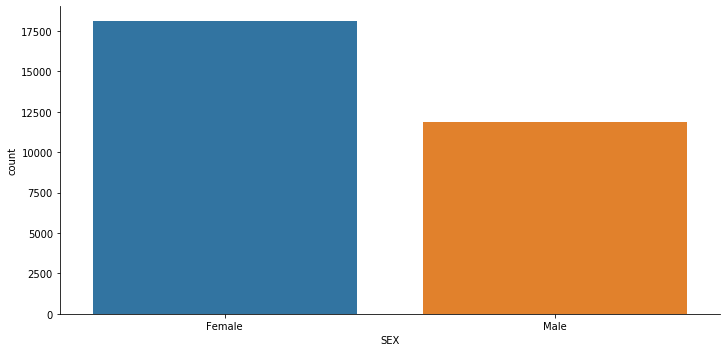

In [58]:
sns.catplot('SEX', data=credit, kind='count', aspect=2)

In [59]:
credit.groupby(['SEX', 'DEFAULT'])['SEX'].count()

SEX     DEFAULT
Female  0          14349
        1           3763
Male    0           9015
        1           2873
Name: SEX, dtype: int64

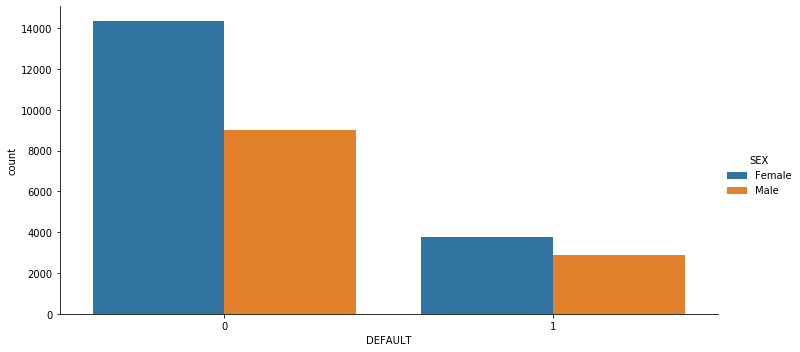

In [60]:
# Plot  sex by default
sns.catplot('DEFAULT', data = credit, hue='SEX', kind='count', aspect = 2)

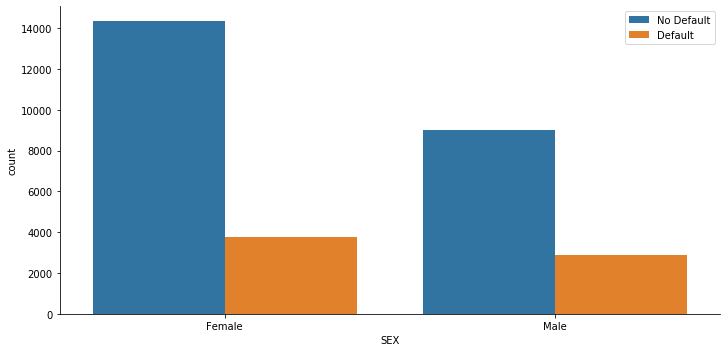

In [61]:
# default by sex
sns.catplot('SEX', data = credit, hue='DEFAULT', kind='count', aspect = 2, legend=False)
plt.legend(['No Default', 'Default'])

#### Additional Visualizations

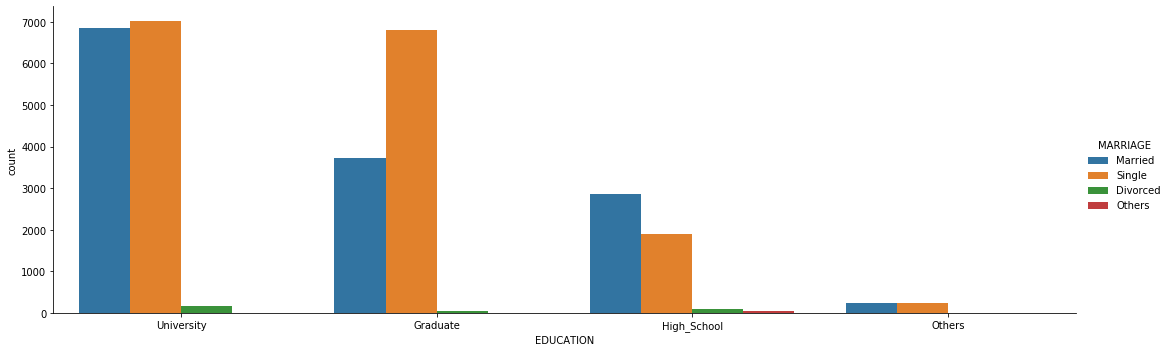

In [62]:
# Education by Marriage
J = sns.catplot('EDUCATION', data = credit, hue='MARRIAGE',kind='count', aspect=3)

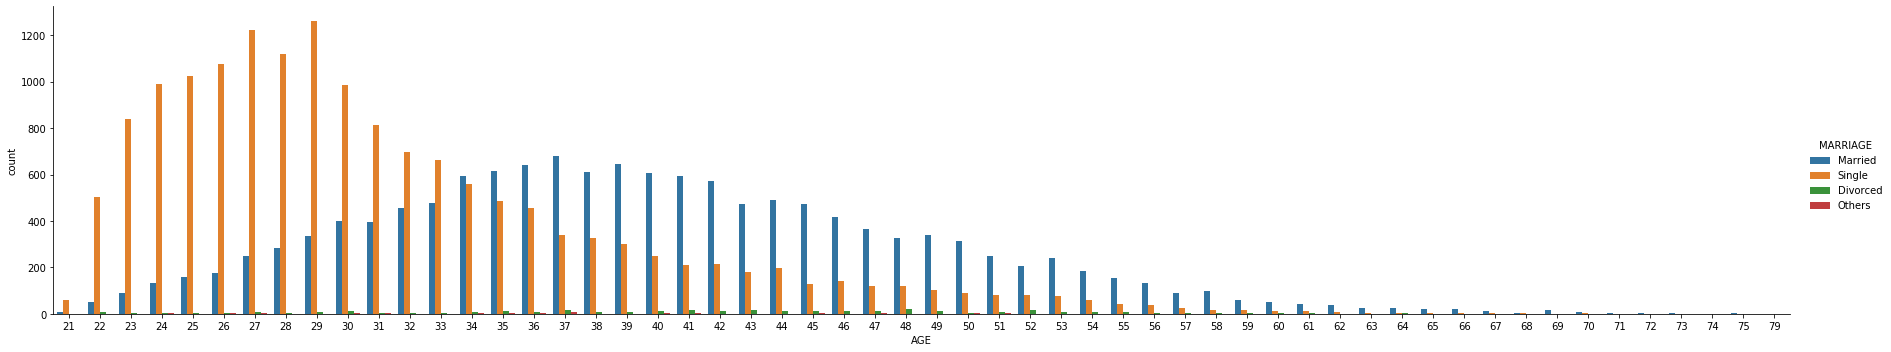

In [63]:
# Age by Marriage
K = sns.catplot('AGE', data = credit, hue='MARRIAGE',kind='count', aspect=5)

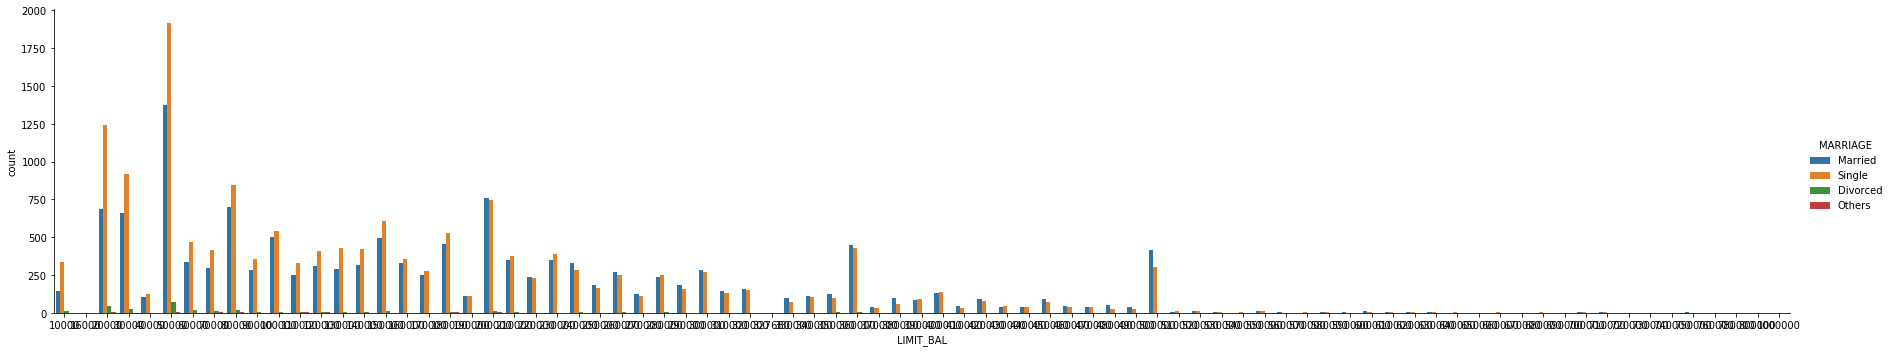

In [64]:
#Credit Limit by Marriage
M = sns.catplot('LIMIT_BAL', data = credit, hue='MARRIAGE',kind='count', aspect=5)

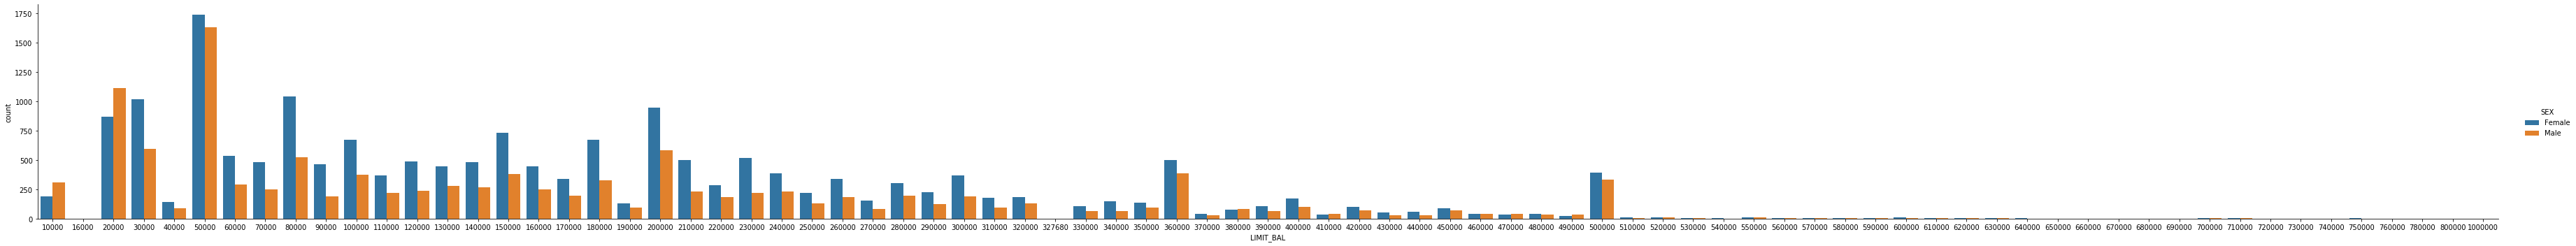

In [65]:
#Credit Limit by Sex
N = sns.catplot('LIMIT_BAL', data = credit, hue='SEX',kind='count', aspect=10)

In [66]:
# Table for default in limit balance bins and sex
limit_bin = [0,200000,400000,600000,800000,1000000]
limit = pd.cut(credit.LIMIT_BAL, limit_bin)
table1 = pd.crosstab(index=[credit.DEFAULT], columns=[limit, credit.SEX])
table1

LIMIT_BAL (0, 200000]       (200000, 400000]       (400000, 600000]       \
SEX            Female  Male           Female  Male           Female Male   
DEFAULT                                                                    
0                9264  5895             4205  2413              841  673   
1                2921  2298              731   469              106  105   

LIMIT_BAL (600000, 800000]      (800000, 1000000]  
SEX                 Female Male            Female  
DEFAULT                                            
0                       38   34                 1  
1                        5    1                 0

In [67]:
# Table showing default in limit balance groups by education levels
table2 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.SEX,credit.EDUCATION])
table2

SEX                         Female                                   Male  \
EDUCATION                 Graduate High_School Others University Graduate   
DEFAULT LIMIT_BAL                                                           
0       (0, 200000]           2695        1762    177       4630     1741   
        (200000, 400000]      1937         398     86       1784     1259   
        (400000, 600000]       446          70     15        310      430   
        (600000, 800000]        22           5      1         10       18   
        (800000, 1000000]        1           0      0          0        0   
1       (0, 200000]            742         596     15       1568      584   
        (200000, 400000]       332          85      4        310      252   
        (400000, 600000]        54          11      0         41       69   
        (600000, 800000]         2           0      0          3        1   

SEX                                                      
EDUCATION                 High_School Others University  
DEFAULT LIMIT_BAL                                        
0       (0, 200000]              1130    105       2919  
        (200000, 400000]          259     43        852  
        (400000, 600000]           53      8        182  
        (600000, 800000]            3      0         13  
        (800000, 1000000]           0      0          0  
1       (0, 200000]               485     12       1217  
        (200000, 400000]           49      1        167  
        (400000, 600000]           11      1         24  
        (600000, 800000]            0      0          0

In [68]:
# Table for default by limit balance bins, marriage status, and education levels
table3 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.MARRIAGE,credit.EDUCATION])
table3.columns.set_levels(['Married', 'Single', 'Divorced', 'Other'], level = 0, inplace=True)
table3.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 1, inplace=True)
table3

MARRIAGE                  Married               Single                   \
EDUCATION                    Grad Univ HS Other   Grad  Univ   HS Other   
DEFAULT LIMIT_BAL                                                         
0       (0, 200000]            26   69  6   104   1158  1610  129  3368   
        (200000, 400000]        9    5  2    14   1339   419   74  1493   
        (400000, 600000]        2    2  0     0    442    74   14   303   
        (600000, 800000]        0    0  0     0     13     4    0    12   
        (800000, 1000000]       0    0  0     0      1     0    0     0   
1       (0, 200000]             9   27  0    44    404   657   12  1325   
        (200000, 400000]        3    0  0     0    287    84    4   295   
        (400000, 600000]        1    0  0     0     77    13    1    43   
        (600000, 800000]        0    0  0     0      1     0    0     3   

MARRIAGE                  Divorced            Other                   
EDUCATION                     Grad Univ Other  Grad  Univ   HS Other  
DEFAULT LIMIT_BAL                                                     
0       (0, 200000]              1   36     3  3251  1177  147  4074  
        (200000, 400000]         3    4     2  1845   229   53  1127  
        (400000, 600000]         0    0     0   432    47    9   189  
        (600000, 800000]         0    0     0    27     4    1    11  
        (800000, 1000000]        0    0     0     0     0    0     0  
1       (0, 200000]              0    4     1   913   393   15  1415  
        (200000, 400000]         0    0     0   294    50    1   182  
        (400000, 600000]         0    0     0    45     9    0    22  
        (600000, 800000]         0    0     0     2     0    0     0

In [69]:
# Table for default by limit balance groups, sex, marriage status, and education levels
table4 = pd.crosstab(index=[credit.DEFAULT, limit], columns=[credit.SEX,credit.MARRIAGE,credit.EDUCATION])
table4.columns.set_levels(['Male','Female'], level = 0, inplace=True)
table4.columns.set_levels(['Married', 'Single', 'Divorced', 'Other'], level = 1, inplace=True)
table4.columns.set_levels(['Grad', 'Univ', 'HS', 'Other'], level = 2, inplace=True)
table4

SEX                          Male                                       \
MARRIAGE                  Married               Single                   
EDUCATION                    Grad Univ HS Other   Grad  Univ  HS Other   
DEFAULT LIMIT_BAL                                                        
0       (0, 200000]            11   46  4    65    674  1069  90  2254   
        (200000, 400000]        5    4  2     9    767   252  45  1010   
        (400000, 600000]        1    1  0     0    203    39  10   182   
        (600000, 800000]        0    0  0     0      8     2   0     3   
        (800000, 1000000]       0    0  0     0      1     0   0     0   
1       (0, 200000]             2   16  0    25    200   399   4   804   
        (200000, 400000]        1    0  0     0    152    47   3   189   
        (400000, 600000]        0    0  0     0     27     5   0    27   
        (600000, 800000]        0    0  0     0      0     0   0     3   

SEX                                      ... Female                          \
MARRIAGE                  Divorced       ... Single           Divorced        
EDUCATION                     Grad Univ  ...   Univ  HS Other     Grad Univ   
DEFAULT LIMIT_BAL                        ...                                  
0       (0, 200000]              1   26  ...    541  39  1114        0   10   
        (200000, 400000]         2    4  ...    167  29   483        1    0   
        (400000, 600000]         0    0  ...     35   4   121        0    0   
        (600000, 800000]         0    0  ...      2   0     9        0    0   
        (800000, 1000000]        0    0  ...      0   0     0        0    0   
1       (0, 200000]              0    2  ...    258   8   521        0    2   
        (200000, 400000]         0    0  ...     37   1   106        0    0   
        (400000, 600000]         0    0  ...      8   1    16        0    0   
        (600000, 800000]         0    0  ...      0   0     0        0    0   

SEX                                                   
MARRIAGE                        Other                 
EDUCATION                 Other  Grad Univ  HS Other  
DEFAULT LIMIT_BAL                                     
0       (0, 200000]           0  1242  556  64  1766  
        (200000, 400000]      1   682   91  14   363  
        (400000, 600000]      0   190   17   4    61  
        (600000, 800000]      0    13    1   0     4  
        (800000, 1000000]     0     0    0   0     0  
1       (0, 200000]           0   373  214   4   677  
        (200000, 400000]      0   115   12   0    61  
        (400000, 600000]      0    18    3   0     8  
        (600000, 800000]      0     0    0   0     0  

[9 rows x 30 columns]

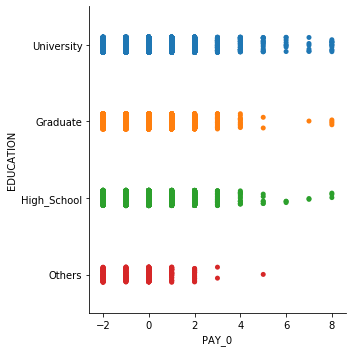

In [70]:
sns.catplot(x='PAY_0', y='EDUCATION', data=credit)


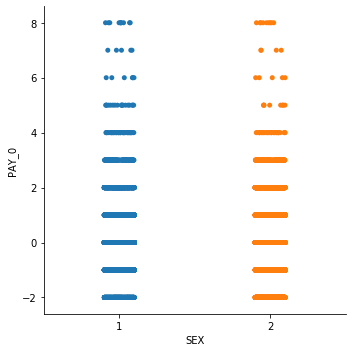

In [71]:
sns.catplot(x='SEX', y='PAY_0', data=credit2)

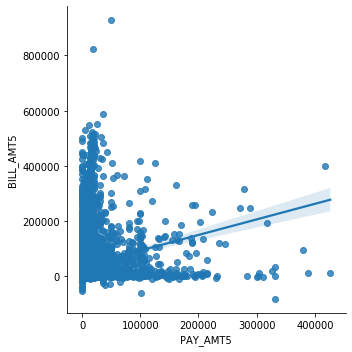

In [72]:
# linear plot of Pay Amount vs Bill Amount
sns.lmplot(x="PAY_AMT5", y="BILL_AMT5", data=credit)
plt.show()

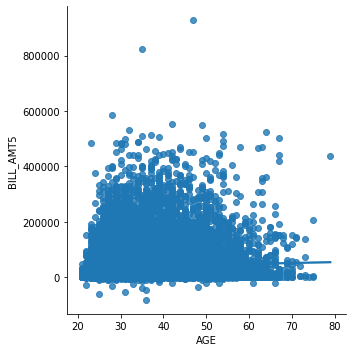

In [73]:
# linear plot of Age vs Bill Amount
sns.lmplot(x="AGE", y="BILL_AMT5", data=credit2)
plt.show()

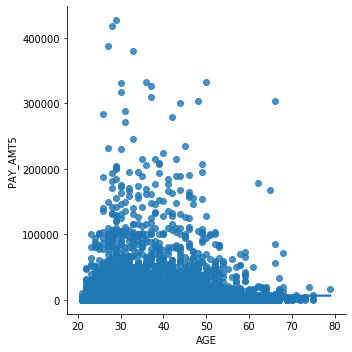

In [74]:
# linear plot of Age vs Pay Amount
sns.lmplot(x="AGE", y="PAY_AMT5", data=credit2)
plt.show()

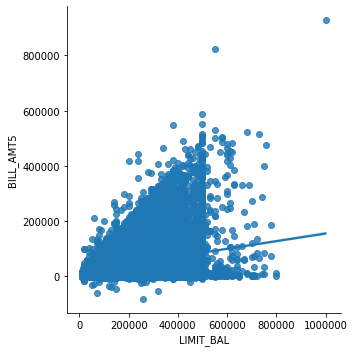

In [75]:
# linear plot of Balance Limit vs Bill Amount
sns.lmplot(x="LIMIT_BAL", y="BILL_AMT5", data=credit2)
plt.show()

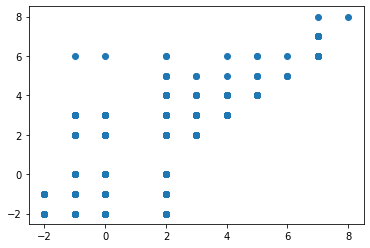

In [76]:
# scatterplot for Pay Comparison
x = credit['PAY_5']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

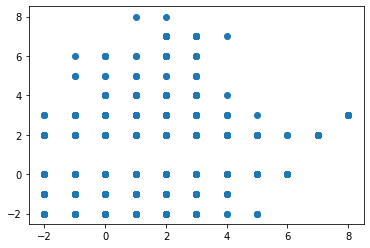

In [77]:
# scatterplot for Pay Comparison
x = credit['PAY_0']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

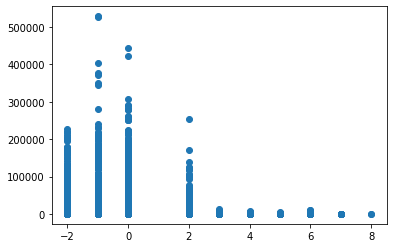

In [78]:
# scatterplot for past payment versus payment amount
x = credit['PAY_6']
y = credit['PAY_AMT6']
plt.scatter(x,y)
plt.show()

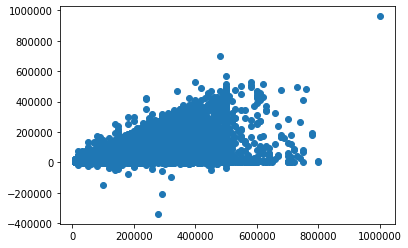

In [79]:
# scatterplot for balance limit versus bill amount
x = credit['LIMIT_BAL']
y = credit['BILL_AMT6']
plt.scatter(x,y)
plt.show()

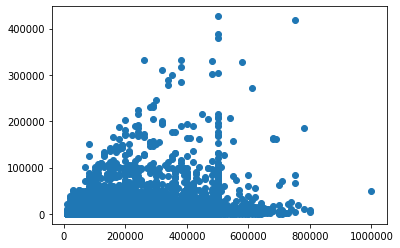

In [80]:
# scatterplot for balance limit versus bill amount
x = credit['LIMIT_BAL']
y = credit['PAY_AMT5']
plt.scatter(x,y)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  PAY_AMT1   30000 non-null  int64
 12  PAY_AMT2   30000 non-null  int64
 13  PAY_AMT3   30000 non-null  int64
 14  PAY_AMT4   30000 non-null  int64
 15  PAY_AMT5   30000 non-null  int64
 16  PAY_AMT6   30000 non-null  int64
 17  DEFAULT    30000 non-null  int64
dtypes: int64(18)
memory usage: 4.1 MB


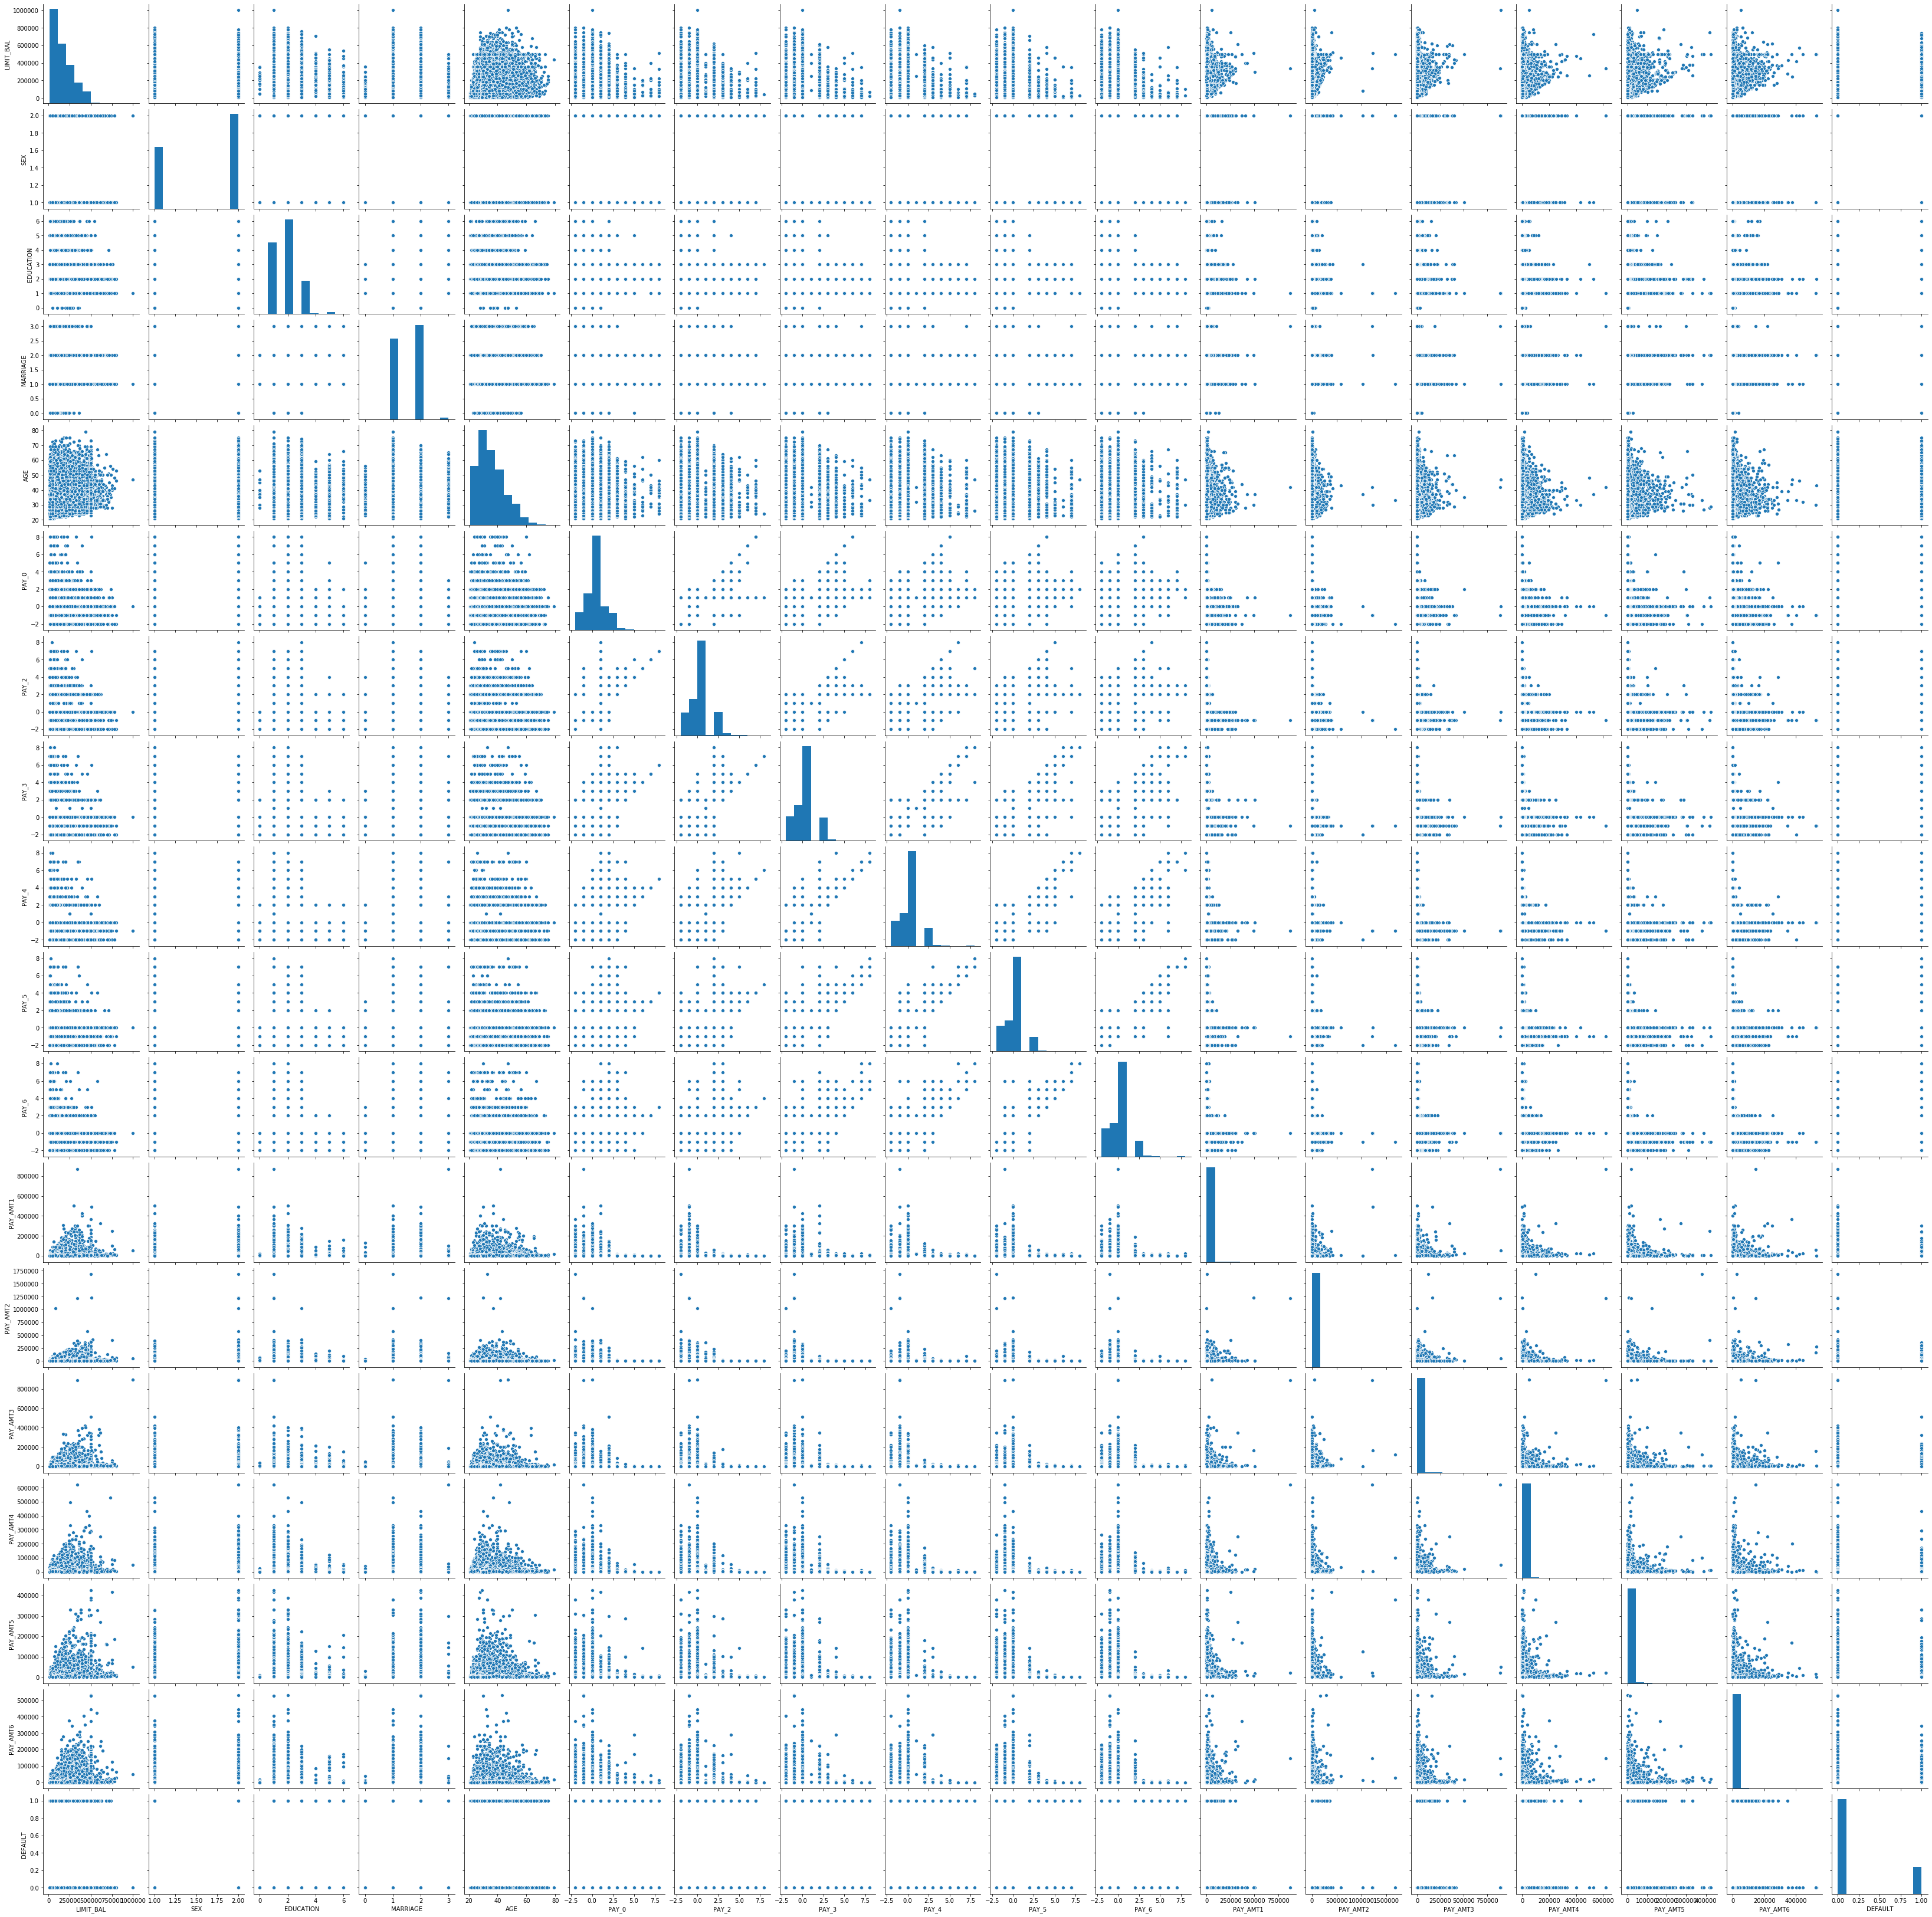

In [83]:
credit_pair = credit2.drop(columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
credit_pair.info()
sns.pairplot(credit_pair)

## Data Structure

In [1]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample

# feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

#estimators
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

In [2]:
rawData = pd.read_csv('/Users/priscillaloebenberg/Desktop/Course5/defaultofcreditcardclients.csv', header =1)
rawData['age_bin']=pd.qcut(rawData['AGE'],6)
rawData['limit_bin']=pd.qcut(rawData['LIMIT_BAL'],10)
rawData.drop(['ID', 'AGE','LIMIT_BAL'], axis = 1, inplace=True)
rawData.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        30000 non-null  int64   
 1   EDUCATION  30000 non-null  int64   
 2   MARRIAGE   30000 non-null  int64   
 3   PAY_0      30000 non-null  int64   
 4   PAY_2      30000 non-null  int64   
 5   PAY_3      30000 non-null  int64   
 6   PAY_4      30000 non-null  int64   
 7   PAY_5      30000 non-null  int64   
 8   PAY_6      30000 non-null  int64   
 9   BILL_AMT1  30000 non-null  int64   
 10  BILL_AMT2  30000 non-null  int64   
 11  BILL_AMT3  30000 non-null  int64   
 12  BILL_AMT4  30000 non-null  int64   
 13  BILL_AMT5  30000 non-null  int64   
 14  BILL_AMT6  30000 non-null  int64   
 15  PAY_AMT1   30000 non-null  int64   
 16  PAY_AMT2   30000 non-null  int64   
 17  PAY_AMT3   30000 non-null  int64   
 18  PAY_AMT4   30000 non-null  int64   
 19  PAY_AMT5   30000 non-null

In [4]:
## Remove variables due to correlation/covariance
credit=rawData.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1)

In [5]:
features = credit.drop(['DEFAULT'], axis=1)
features['SEX'] = pd.Categorical(features.SEX)
features['EDUCATION'] = pd.Categorical(features.EDUCATION)
features['MARRIAGE'] = pd.Categorical(features.MARRIAGE)
features['limit_bin'] = pd.Categorical(features.limit_bin)
features['age_bin'] = pd.Categorical(features.age_bin)
features['PAY_0'] = pd.Categorical(features.PAY_0)
features['PAY_2'] = pd.Categorical(features.PAY_2)
features['PAY_3'] = pd.Categorical(features.PAY_3)
features['PAY_4'] = pd.Categorical(features.PAY_4)
features['PAY_5'] = pd.Categorical(features.PAY_5)
features['PAY_6'] = pd.Categorical(features.PAY_6)
features.head()
features.dtypes


SEX          category
EDUCATION    category
MARRIAGE     category
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
age_bin      category
limit_bin    category
dtype: object

In [6]:
#dependent variable
depVar = credit['DEFAULT']
depVarCat = pd.Categorical(depVar)
print(depVar)
print(depVarCat)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64
[1, 1, 0, 0, 0, ..., 0, 0, 1, 1, 1]
Length: 30000
Categories (2, int64): [0, 1]


## Covariance

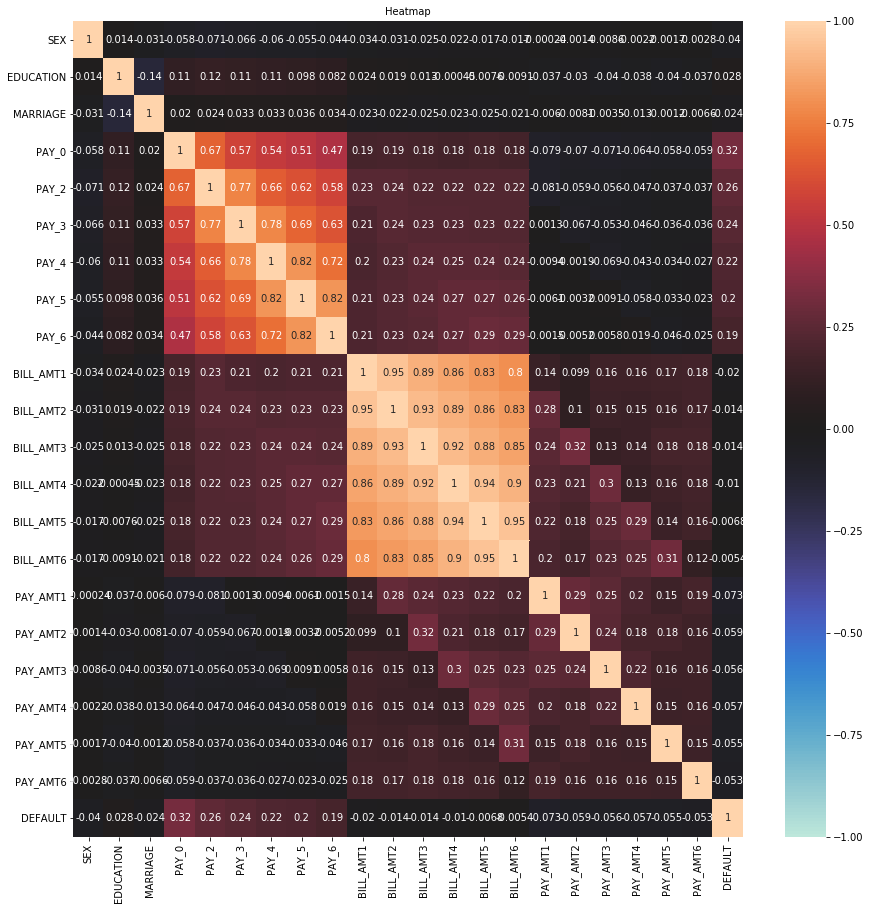

In [7]:
rawData.corr
#raw data
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(rawData.corr(),annot=True, center=0, vmin=-1, vmax=1, ax=ax)
plt.title('Heatmap',
         fontsize=10)
plt.show()

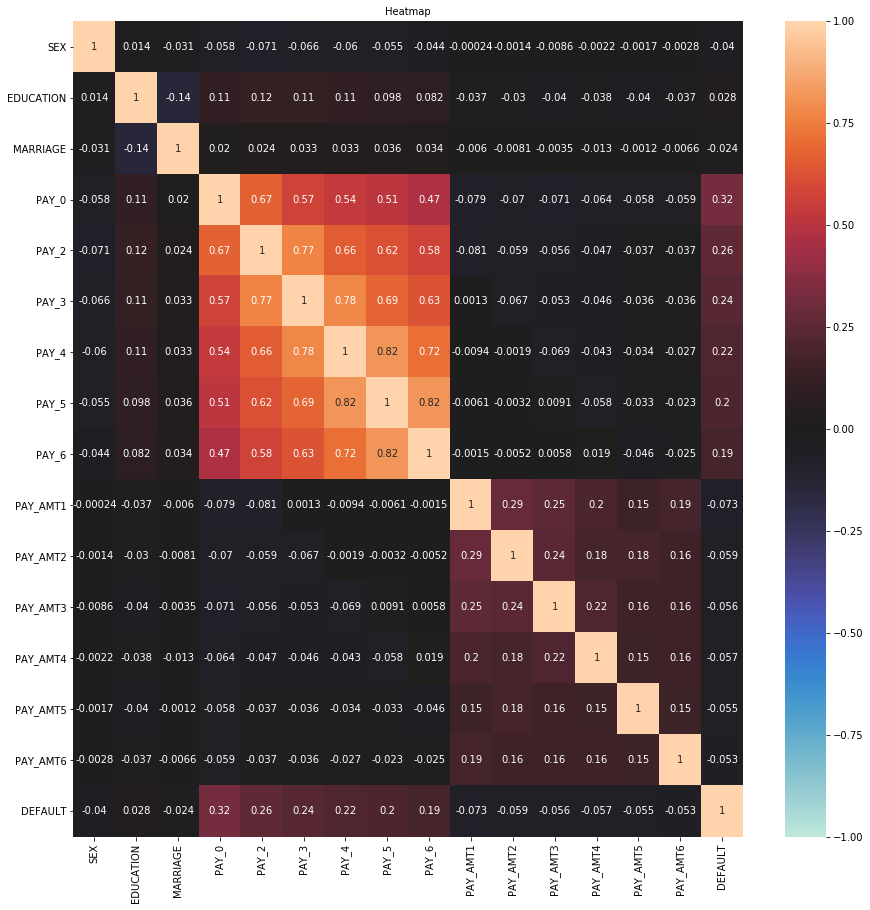

In [8]:
credit.corr
#bill amounts removed
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(credit.corr(),annot=True, center=0, vmin=-1, vmax=1, ax=ax)
plt.title('Heatmap',
         fontsize=10)
plt.show()

## Feature Engineering

In [9]:
credit.info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        30000 non-null  int64   
 1   EDUCATION  30000 non-null  int64   
 2   MARRIAGE   30000 non-null  int64   
 3   PAY_0      30000 non-null  int64   
 4   PAY_2      30000 non-null  int64   
 5   PAY_3      30000 non-null  int64   
 6   PAY_4      30000 non-null  int64   
 7   PAY_5      30000 non-null  int64   
 8   PAY_6      30000 non-null  int64   
 9   PAY_AMT1   30000 non-null  int64   
 10  PAY_AMT2   30000 non-null  int64   
 11  PAY_AMT3   30000 non-null  int64   
 12  PAY_AMT4   30000 non-null  int64   
 13  PAY_AMT5   30000 non-null  int64   
 14  PAY_AMT6   30000 non-null  int64   
 15  DEFAULT    30000 non-null  int64   
 16  age_bin    30000 non-null  category
 17  limit_bin  30000 non-null  category
dtypes: category(2), int64(16)
memory usage: 3.7 MB
<class 'pandas.core

In [10]:
featuresDummy=pd.get_dummies(features, columns=['age_bin', 'limit_bin'])
featuresClean=featuresDummy
featuresClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SEX                              30000 non-null  category
 1   EDUCATION                        30000 non-null  category
 2   MARRIAGE                         30000 non-null  category
 3   PAY_0                            30000 non-null  category
 4   PAY_2                            30000 non-null  category
 5   PAY_3                            30000 non-null  category
 6   PAY_4                            30000 non-null  category
 7   PAY_5                            30000 non-null  category
 8   PAY_6                            30000 non-null  category
 9   PAY_AMT1                         30000 non-null  int64   
 10  PAY_AMT2                         30000 non-null  int64   
 11  PAY_AMT3                         30000 non-null  int64   
 12  PAY_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(featuresClean, depVar, test_size=.30)
print(X_train.shape, X_test.shape)

(21000, 31) (9000, 31)


In [12]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
y_train_pca=y_train
y_test_pca=y_test

explained_variance_pca=pca.explained_variance_ratio_
explained_variance_pca

array([3.58564166e-01, 1.60441123e-01, 1.37773084e-01, 1.19954629e-01,
       1.14634918e-01, 1.08632075e-01, 3.30433087e-09, 5.19201475e-10,
       3.66932816e-10, 3.13863853e-10])

In [13]:
X_train_pca.shape
X_test_pca.shape

(9000, 10)

Text(0, 0.5, 'Second Principal Component')

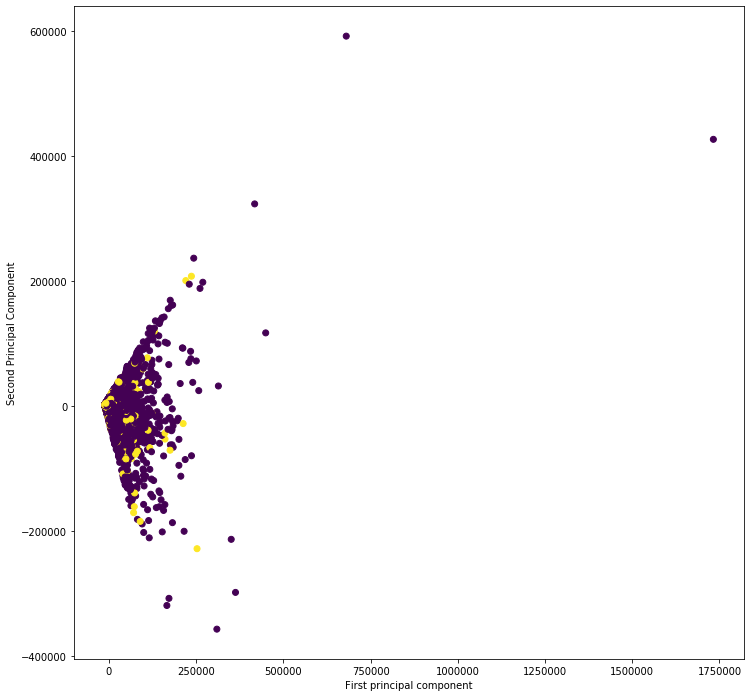

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

(0, 5)

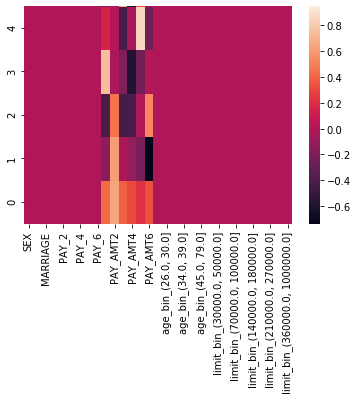

<Figure size 1080x720 with 0 Axes>

In [15]:
map= pd.DataFrame(pca.components_,columns=featuresClean.keys())
ax4= plt.subplot()
plt.figure(figsize=(15,10))
sn.heatmap(map, ax=ax4)
ax4.set_ylim([0,5])

# Building the Models and Choosing the Right Model

## Random Forest

In [27]:
modelRF = RandomForestClassifier(max_depth=2, random_state=0)
modelRF.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelRF, X_train_pca, y_train_pca))
print ('Model Score', modelRF.score(X_train_pca,y_train_pca))
y_pred_RF = modelRF.predict(X_test_pca)

Cross Validation Score [0.78214286 0.785      0.78261905 0.7847619  0.78071429]
Model Score 0.7840952380952381


In [28]:
print('Accuracy Random Forest', accuracy_score(y_test_pca, y_pred_RF))
print('Area Under the Receiver Operating Characteristic Curve', roc_auc_score(y_test_pca, y_pred_RF))
print('Precision Random Forest', precision_score(y_test_pca, y_pred_RF))

Accuracy Random Forest 0.7902222222222223
Area Under the Receiver Operating Characteristic Curve 0.5234390446648556
Precision Random Forest 0.6583850931677019


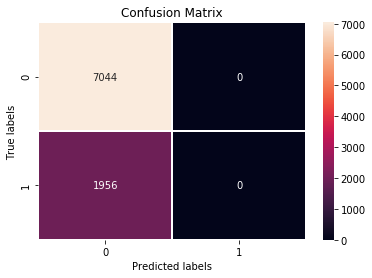

In [33]:
cmRF = confusion_matrix(y_test_pca, y_pred_RF)
ax1= plt.subplot()
sn.heatmap(cmRF, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
plt.show()

In [16]:
modelRF2 = RandomForestClassifier(max_depth=10, random_state=0)
modelRF2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelRF2, X_train_pca, y_train_pca))
print ('Model Score', modelRF2.score(X_train_pca,y_train_pca))
y_pred_RF2 = modelRF2.predict(X_test_pca)
print('Accuracy Random Forest', accuracy_score(y_test_pca, y_pred_RF2))
print('Area Under the Receiver Operating Characteristic Curve', roc_auc_score(y_test_pca, y_pred_RF2))
print('Precision Random Forest', precision_score(y_test_pca, y_pred_RF2))

Cross Validation Score [0.8247619  0.82142857 0.81333333 0.815      0.81214286]
Model Score 0.8570952380952381
Accuracy Random Forest 0.8148888888888889
Area Under the Receiver Operating Characteristic Curve 0.6483896322294216
Precision Random Forest 0.6453110492107706


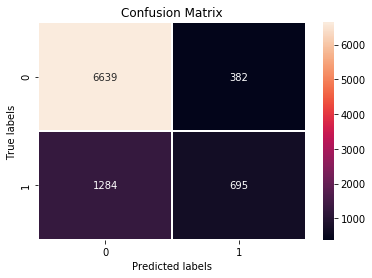

In [17]:
cmRF2 = confusion_matrix(y_test_pca, y_pred_RF2)
ax1= plt.subplot()
sn.heatmap(cmRF2, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
plt.show()


## KNN

In [18]:
modelKNN = KNeighborsClassifier(algorithm="auto", n_neighbors=3)
modelKNN.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelKNN, X_train_pca, y_train_pca))
print ('Model Score', modelKNN.score(X_train_pca,y_train_pca))
y_pred_KNN = modelKNN.predict(X_test_pca)
print('Accuracy KNN', accuracy_score(y_test_pca, y_pred_KNN))
print('ROC_AUC KNN', roc_auc_score(y_test_pca, y_pred_KNN))
print('Precision KNN', precision_score(y_test_pca, y_pred_KNN))

Cross Validation Score [0.7352381  0.73       0.73261905 0.73285714 0.73333333]
Model Score 0.8449523809523809
Accuracy KNN 0.7375555555555555
ROC_AUC KNN 0.5534645611998192
Precision KNN 0.3495679497250589


In [20]:
modelKNN2 = KNeighborsClassifier(algorithm="auto", n_neighbors=2)
modelKNN2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelKNN2, X_train_pca, y_train_pca))
print ('Model Score', modelKNN2.score(X_train_pca,y_train_pca))
y_pred_KNN2 = modelKNN2.predict(X_test_pca)
print('Accuracy KNN', accuracy_score(y_test_pca, y_pred_KNN2))
print('ROC_AUC KNN', roc_auc_score(y_test_pca, y_pred_KNN2))
print('Precision KNN', precision_score(y_test_pca, y_pred_KNN2))

Cross Validation Score [0.76119048 0.76690476 0.77       0.7602381  0.76095238]
Model Score 0.845
Accuracy KNN 0.7666666666666667
ROC_AUC KNN 0.5327508415344453
Precision KNN 0.3951473136915078


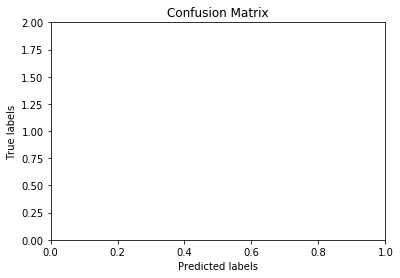

In [21]:
cmKNN2 = confusion_matrix(y_test_pca, y_pred_KNN2)
ax2= plt.subplot()
sn.heatmap(cmKNN2, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax2.set_ylim([0,2])
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix'); 
plt.show()


## SVC

In [22]:
modelSVC = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
modelSVC.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC, X_train_pca, y_train_pca))
print ('Model Score', modelSVC.score(X_train_pca,y_train_pca))
y_pred_SVC = modelSVC.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC))

Cross Validation Score [0.77880952 0.78095238 0.78214286 0.78095238 0.77952381]
Model Score 0.9815714285714285
Accuracy SVC 0.7846666666666666
ROC_AUC SVC 0.5128988980506686
Precision SVC 0.7971014492753623


In [23]:
modelSVC = SVC(C=5.0, kernel='rbf', degree=3, gamma='auto')
modelSVC.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC, X_train_pca, y_train_pca))
print ('Model Score', modelSVC.score(X_train_pca,y_train_pca))
y_pred_SVC = modelSVC.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC))

Cross Validation Score [0.77761905 0.77928571 0.78142857 0.7802381  0.77857143]
Model Score 0.9836666666666667
Accuracy SVC 0.7822222222222223
ROC_AUC SVC 0.512239359306042
Precision SVC 0.594059405940594


In [ ]:
modelSVC2 = SVC(kernel = 'poly', degree = 5, random_state = 0)
modelSVC2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC2, X_train_pca, y_train_pca))
print ('Model Score', modelSVC2.score(X_train_pca,y_train_pca))
y_pred_SVC2 = modelSVC2.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC2))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC2))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC2))

## No payment history

In [8]:
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample

# feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

#estimators
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

In [9]:
rawData = pd.read_csv('/Users/priscillaloebenberg/Desktop/Course5/defaultofcreditcardclients.csv', header =1)
rawData['age_bin']=pd.qcut(rawData['AGE'],6)
rawData['limit_bin']=pd.qcut(rawData['LIMIT_BAL'],10)
rawData.drop(['ID','AGE','LIMIT_BAL','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1, inplace=True)
rawData.rename(columns={'default payment next month':'DEFAULT'}, inplace = True)
CreditNH=rawData

In [10]:
CreditNH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        30000 non-null  int64   
 1   EDUCATION  30000 non-null  int64   
 2   MARRIAGE   30000 non-null  int64   
 3   DEFAULT    30000 non-null  int64   
 4   age_bin    30000 non-null  category
 5   limit_bin  30000 non-null  category
dtypes: category(2), int64(4)
memory usage: 996.9 KB


In [12]:
features = CreditNH.drop(['DEFAULT'], axis=1)
features['SEX'] = pd.Categorical(features.SEX)
features['EDUCATION'] = pd.Categorical(features.EDUCATION)
features['MARRIAGE'] = pd.Categorical(features.MARRIAGE)
features['limit_bin'] = pd.Categorical(features.limit_bin)
features['age_bin'] = pd.Categorical(features.age_bin)
features.head()
features.dtypes


SEX          category
EDUCATION    category
MARRIAGE     category
age_bin      category
limit_bin    category
dtype: object

In [13]:
#dependent variable
depVar = CreditNH['DEFAULT']
depVarCat = pd.Categorical(depVar)
print(depVar)
print(depVarCat)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64
[1, 1, 0, 0, 0, ..., 0, 0, 1, 1, 1]
Length: 30000
Categories (2, int64): [0, 1]


## Covariance

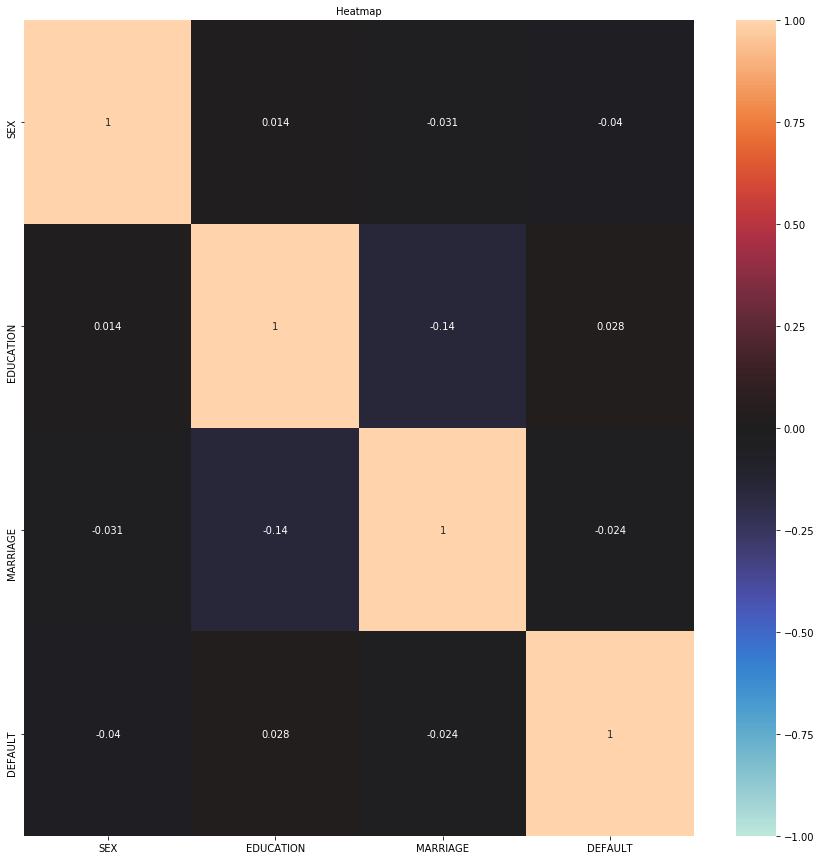

In [14]:
CreditNH.corr
#bill amounts removed
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(CreditNH.corr(),annot=True, center=0, vmin=-1, vmax=1, ax=ax)
plt.title('Heatmap',
         fontsize=10)
plt.show()

## Feature Engineering

In [15]:
CreditNH.info()
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        30000 non-null  int64   
 1   EDUCATION  30000 non-null  int64   
 2   MARRIAGE   30000 non-null  int64   
 3   DEFAULT    30000 non-null  int64   
 4   age_bin    30000 non-null  category
 5   limit_bin  30000 non-null  category
dtypes: category(2), int64(4)
memory usage: 996.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SEX        30000 non-null  category
 1   EDUCATION  30000 non-null  category
 2   MARRIAGE   30000 non-null  category
 3   age_bin    30000 non-null  category
 4   limit_bin  30000 non-null  category
dtypes: category(5)
memory usage: 148.0 KB


In [16]:
featuresDummy=pd.get_dummies(features, columns=['age_bin', 'limit_bin'])
featuresClean=featuresDummy
featuresClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SEX                              30000 non-null  category
 1   EDUCATION                        30000 non-null  category
 2   MARRIAGE                         30000 non-null  category
 3   age_bin_(20.999, 26.0]           30000 non-null  uint8   
 4   age_bin_(26.0, 30.0]             30000 non-null  uint8   
 5   age_bin_(30.0, 34.0]             30000 non-null  uint8   
 6   age_bin_(34.0, 39.0]             30000 non-null  uint8   
 7   age_bin_(39.0, 45.0]             30000 non-null  uint8   
 8   age_bin_(45.0, 79.0]             30000 non-null  uint8   
 9   limit_bin_(9999.999, 30000.0]    30000 non-null  uint8   
 10  limit_bin_(30000.0, 50000.0]     30000 non-null  uint8   
 11  limit_bin_(50000.0, 70000.0]     30000 non-null  uint8   
 12  limi

In [17]:
X_train, X_test, y_train, y_test = train_test_split(featuresClean, depVar, test_size=.30)
print(X_train.shape, X_test.shape)

(21000, 19) (9000, 19)


In [18]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
y_train_pca=y_train
y_test_pca=y_test

explained_variance_pca=pca.explained_variance_ratio_
explained_variance_pca

array([0.22901599, 0.11315297, 0.08562988, 0.06769608, 0.05811624,
       0.05596249, 0.05295313, 0.04476476, 0.03974375, 0.03876382])

In [19]:
X_train_pca.shape
X_test_pca.shape

(9000, 10)

Text(0, 0.5, 'Second Principal Component')

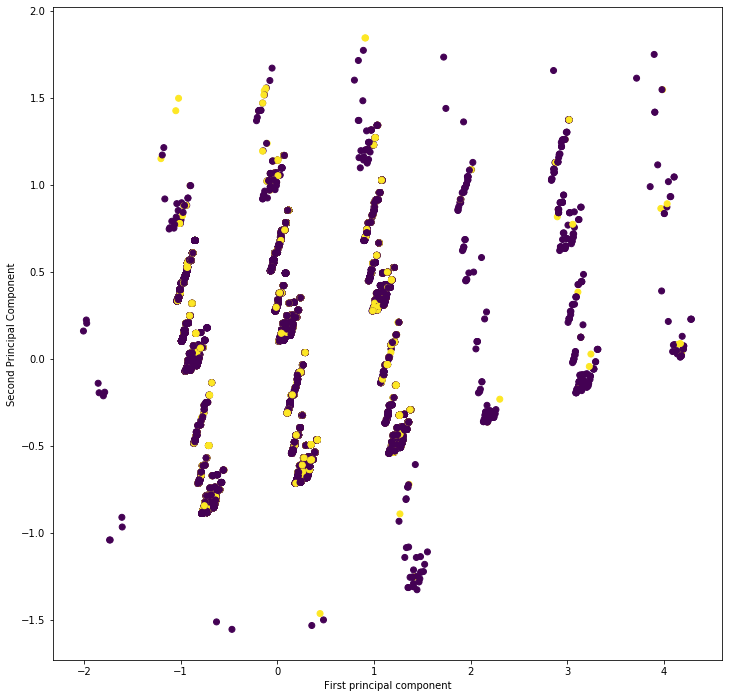

In [20]:
plt.figure(figsize=(12,12))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

(0, 5)

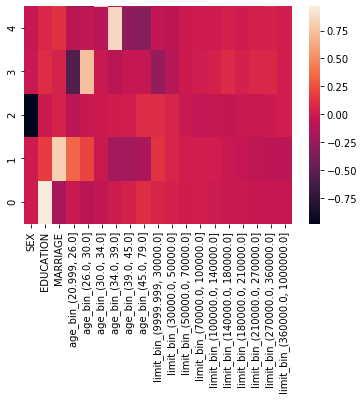

<Figure size 1080x720 with 0 Axes>

In [21]:
map= pd.DataFrame(pca.components_,columns=featuresClean.keys())
ax4= plt.subplot()
plt.figure(figsize=(15,10))
sn.heatmap(map, ax=ax4)
ax4.set_ylim([0,5])

# Building the Models and Choosing the Right Model

## Random Forest

In [22]:
modelRF = RandomForestClassifier(max_depth=2, random_state=0)
modelRF.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelRF, X_train_pca, y_train_pca))
print ('Model Score', modelRF.score(X_train_pca,y_train_pca))
y_pred_RF = modelRF.predict(X_test_pca)

Cross Validation Score [0.77714286 0.77714286 0.77714286 0.77714286 0.77714286]
Model Score 0.7771428571428571


In [23]:
print('Accuracy Random Forest', accuracy_score(y_test_pca, y_pred_RF))
print('Area Under the Receiver Operating Characteristic Curve', roc_auc_score(y_test_pca, y_pred_RF))
print('Precision Random Forest', precision_score(y_test_pca, y_pred_RF))

Accuracy Random Forest 0.7826666666666666
Area Under the Receiver Operating Characteristic Curve 0.5
Precision Random Forest 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


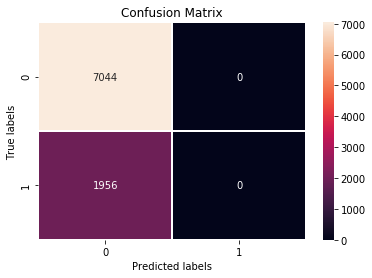

In [24]:
cmRF = confusion_matrix(y_test_pca, y_pred_RF)
ax1= plt.subplot()
sn.heatmap(cmRF, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
plt.show()

In [25]:
modelRF2 = RandomForestClassifier(max_depth=10, random_state=0)
modelRF2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelRF2, X_train_pca, y_train_pca))
print ('Model Score', modelRF2.score(X_train_pca,y_train_pca))
y_pred_RF2 = modelRF2.predict(X_test_pca)
print('Accuracy Random Forest', accuracy_score(y_test_pca, y_pred_RF2))
print('Area Under the Receiver Operating Characteristic Curve', roc_auc_score(y_test_pca, y_pred_RF2))
print('Precision Random Forest', precision_score(y_test_pca, y_pred_RF2))

Cross Validation Score [0.77333333 0.77833333 0.77357143 0.77380952 0.77333333]
Model Score 0.7801428571428571
Accuracy Random Forest 0.7794444444444445
Area Under the Receiver Operating Characteristic Curve 0.5031114676198339
Precision Random Forest 0.32941176470588235


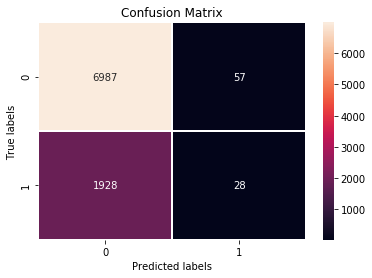

In [26]:
cmRF2 = confusion_matrix(y_test_pca, y_pred_RF2)
ax1= plt.subplot()
sn.heatmap(cmRF2, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax1.set_xlabel('Predicted labels');
ax1.set_ylabel('True labels'); 
ax1.set_title('Confusion Matrix'); 
plt.show()


## KNN

In [27]:
modelKNN = KNeighborsClassifier(algorithm="auto", n_neighbors=3)
modelKNN.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelKNN, X_train_pca, y_train_pca))
print ('Model Score', modelKNN.score(X_train_pca,y_train_pca))
y_pred_KNN = modelKNN.predict(X_test_pca)
print('Accuracy KNN', accuracy_score(y_test_pca, y_pred_KNN))
print('ROC_AUC KNN', roc_auc_score(y_test_pca, y_pred_KNN))
print('Precision KNN', precision_score(y_test_pca, y_pred_KNN))

Cross Validation Score [0.695      0.71285714 0.71047619 0.71833333 0.71857143]
Model Score 0.7218571428571429
Accuracy KNN 0.7088888888888889
ROC_AUC KNN 0.5137993262333518
Precision KNN 0.24924471299093656


In [28]:
modelKNN2 = KNeighborsClassifier(algorithm="auto", n_neighbors=2)
modelKNN2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelKNN2, X_train_pca, y_train_pca))
print ('Model Score', modelKNN2.score(X_train_pca,y_train_pca))
y_pred_KNN2 = modelKNN2.predict(X_test_pca)
print('Accuracy KNN', accuracy_score(y_test_pca, y_pred_KNN2))
print('ROC_AUC KNN', roc_auc_score(y_test_pca, y_pred_KNN2))
print('Precision KNN', precision_score(y_test_pca, y_pred_KNN2))

Cross Validation Score [0.74738095 0.74595238 0.75095238 0.74904762 0.7502381 ]
Model Score 0.7562380952380953
Accuracy KNN 0.7576666666666667
ROC_AUC KNN 0.5065552025306314
Precision KNN 0.2601279317697228


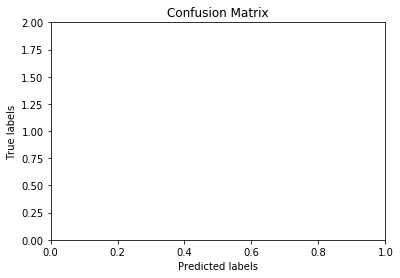

In [29]:
cmKNN2 = confusion_matrix(y_test_pca, y_pred_KNN2)
ax2= plt.subplot()
sn.heatmap(cmKNN2, annot=True, ax = ax1, fmt="d", linewidths=.5)
ax2.set_ylim([0,2])
ax2.set_xlabel('Predicted labels');
ax2.set_ylabel('True labels'); 
ax2.set_title('Confusion Matrix'); 
plt.show()


## SVC

In [30]:
modelSVC = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
modelSVC.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC, X_train_pca, y_train_pca))
print ('Model Score', modelSVC.score(X_train_pca,y_train_pca))
y_pred_SVC = modelSVC.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC))

Cross Validation Score [0.77714286 0.77714286 0.77714286 0.77714286 0.77714286]
Model Score 0.7771428571428571
Accuracy SVC 0.7826666666666666
ROC_AUC SVC 0.5
Precision SVC 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
modelSVC = SVC(C=5.0, kernel='rbf', degree=3, gamma='auto')
modelSVC.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC, X_train_pca, y_train_pca))
print ('Model Score', modelSVC.score(X_train_pca,y_train_pca))
y_pred_SVC = modelSVC.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC))

Cross Validation Score [0.77714286 0.77714286 0.77714286 0.77714286 0.77714286]
Model Score 0.7771428571428571
Accuracy SVC 0.7826666666666666
ROC_AUC SVC 0.5
Precision SVC 0.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
modelSVC2 = SVC(kernel = 'poly', degree = 5, random_state = 0)
modelSVC2.fit(X_train_pca, y_train_pca)
print('Cross Validation Score', cross_val_score(modelSVC2, X_train_pca, y_train_pca))
print ('Model Score', modelSVC2.score(X_train_pca,y_train_pca))
y_pred_SVC2 = modelSVC2.predict(X_test_pca)
print('Accuracy SVC', accuracy_score(y_test_pca, y_pred_SVC2))
print('ROC_AUC SVC', roc_auc_score(y_test_pca, y_pred_SVC2))
print('Precision SVC', precision_score(y_test_pca, y_pred_SVC2))

Cross Validation Score [0.77452381 0.77595238 0.77428571 0.77214286 0.77642857]
Model Score 0.779
Accuracy SVC 0.7807777777777778
ROC_AUC SVC 0.5021168431210655
Precision SVC 0.33962264150943394
